Ejercicio 3

Modifica los gráficos anteriores para añadir etiquetas, leyendas, cambios de color, títulos…

In [22]:
# Import libraries
import pandas as pd
import plotnine as pn

In [23]:
# Create DataFrame
athletes_data = pd.read_csv('./athlete_events.csv')

In [24]:
russian_athletes = athletes_data[athletes_data["Team"] == "Russia"]
russian_medalist_athletes = russian_athletes[russian_athletes["Medal"].notna()]

# This assumes you have a 'Medal' column in the dataframe after the grouping
russian_medalist_athletes_yearly = russian_medalist_athletes.groupby(["Year", "Sex"])[
    "Medal"].count().reset_index(name='Count')

russian_medalist_athletes_yearly_recent = russian_medalist_athletes_yearly[
    russian_medalist_athletes_yearly["Year"] >= 1994]

C:\Users\jsanchez\AppData\Local\Temp\ipykernel_19072\2133112520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jsanchez\AppData\Local\Temp\ipykernel_19072\2133112520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


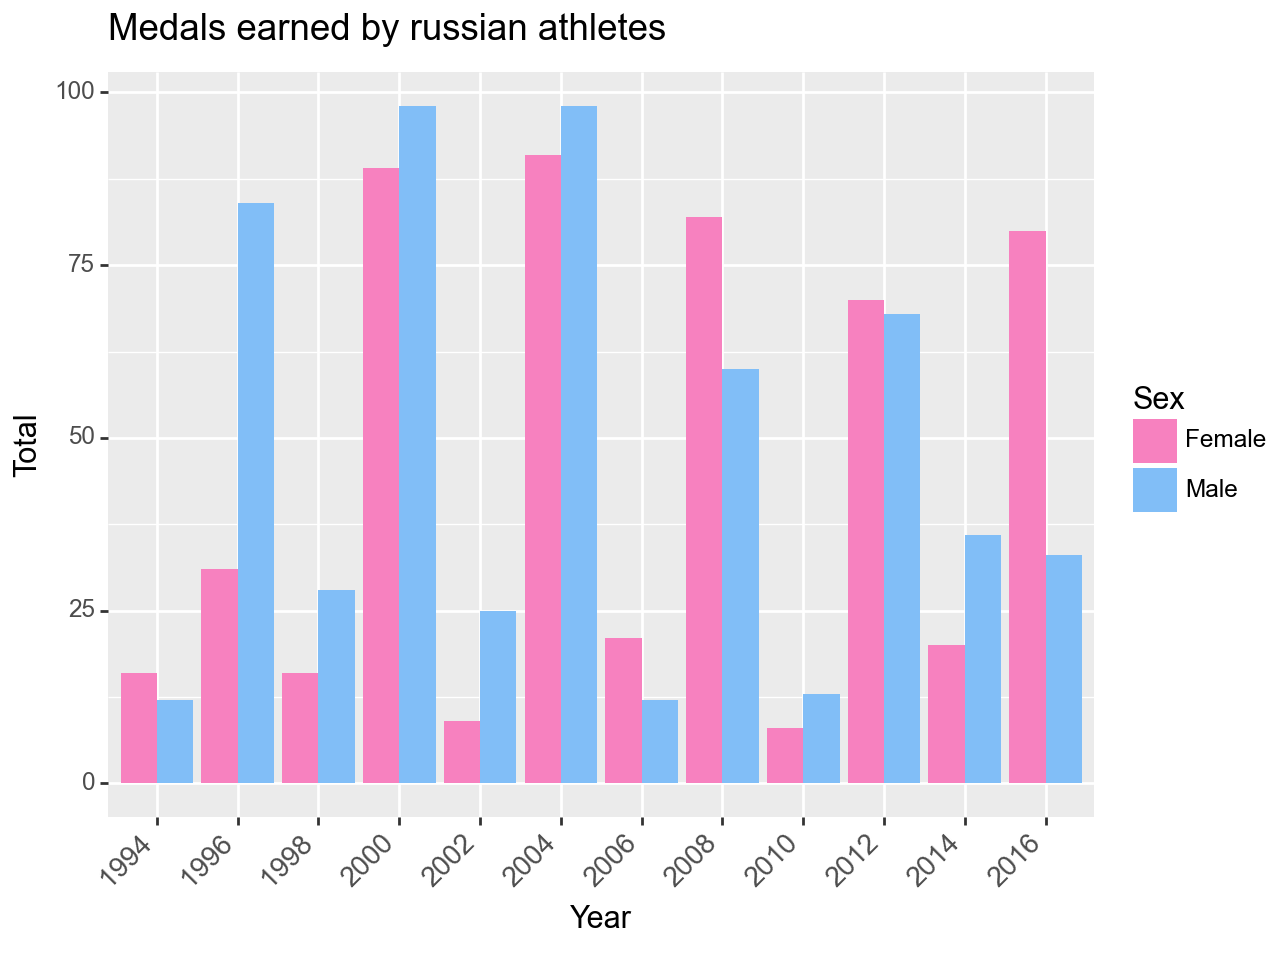

In [25]:
# Ensure that 'Year' is treated as a categorical variable by converting it to a string if it's not already
russian_medalist_athletes_yearly_recent['Year'] = russian_medalist_athletes_yearly_recent['Year'].astype(str)

# Replace F for Female and M for Male
russian_medalist_athletes_yearly_recent['Sex'] = russian_medalist_athletes_yearly_recent['Sex'].replace(
    {'F': 'Female', 'M': 'Male'})

# Get all unique years from the data frame for the x-axis labels
unique_years = russian_medalist_athletes_yearly_recent['Year'].unique()

stacked_bar_chart = (
        pn.ggplot(russian_medalist_athletes_yearly_recent, pn.aes(**{"x": 'Year', "y": 'Count', "fill": 'Sex'})) +
        pn.geom_bar(stat='identity', position='dodge') +
        pn.ggtitle('Medals earned by russian athletes') +
        pn.xlab('Year') +
        pn.ylab('Total') +
        pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1, size=10)) +
        pn.scale_x_discrete(limits=unique_years) +
        pn.scale_fill_manual(values={"Female": "#F781BF", "Male": "#81BEF7"})
)

# Display the chart
stacked_bar_chart.draw()